# Data Mining Project
## Football Prediction 

Submitted by: Arbër Hyseni, Albin Bajrami, Andi Hyseni<br>
Supervised by: Prof. Dr. Lule Ahmedi

The cell below imports our needed libraries to run our project
Numpy is a library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.<br>
__Pandas__ is a Python library used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data. The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis".<br>
__Seaborn__  is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br>
__Matplotlib__ is a comprehensive library for creating static, animated, and interactive visualizations in Python.<br>
__Sklearn__ provides simple and efficient tools for predictive data analysis, its used for classification, regression, clustering, dimensionality reduction, model selection, preprocessing.<br>
__SVC(Support Vector Classifier)__ is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

# IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
%matplotlib inline

In the cell below we import our csv files (datasets) that are needed for futher processing

# DATA IMPORTING

In [2]:
res = pd.read_csv(r'C:\Users\arber\Desktop\results.csv')
cup = pd.read_csv(r'C:\Users\arber\Desktop\WorldCups.csv')

Using DataFrames provided by Pandas library, which are two-dimensional tabular data, we group data by columns and count them so the needed tables are created using matplotlib pyplot.
In this graph we see teams who did the most goals

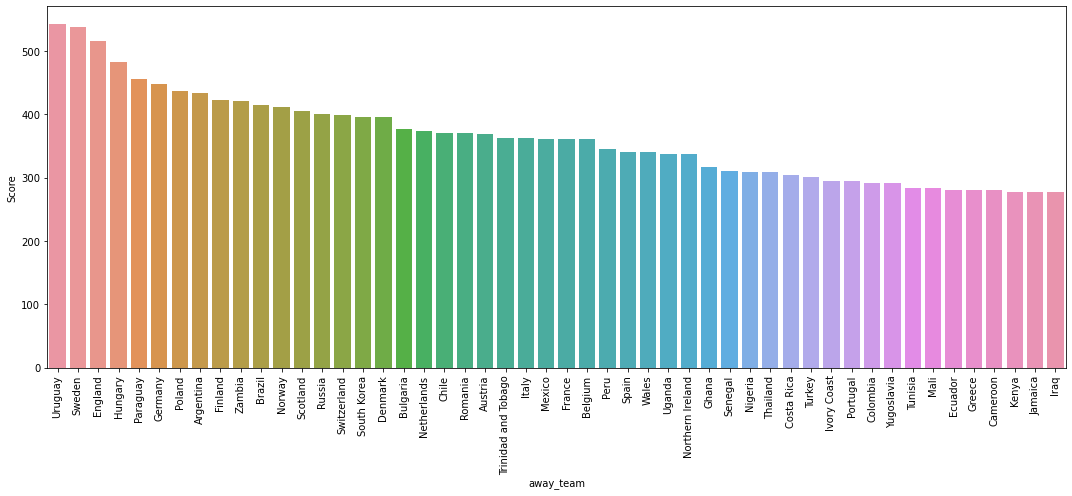

In [3]:
scores_home = res
away_team=pd.DataFrame(res.groupby('away_team')['home_score'].count().index)
away_score=pd.DataFrame(res.groupby('away_team')['home_score'].count().values,columns=['Score'])
away_score_team=pd.concat([away_team,away_score],axis=1)

plt.figure(figsize=(15,7))
away_score_team=away_score_team.sort_values(by='Score',ascending=False)
sns.barplot(x=away_score_team.away_team[:50],y=away_score_team.Score[:50])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Using seaborn we can create beautiful graphs, what we did here is we aggregated data on the column 'tournament' and displayed them using 
We can see that there are more friendly games played than official tournaments

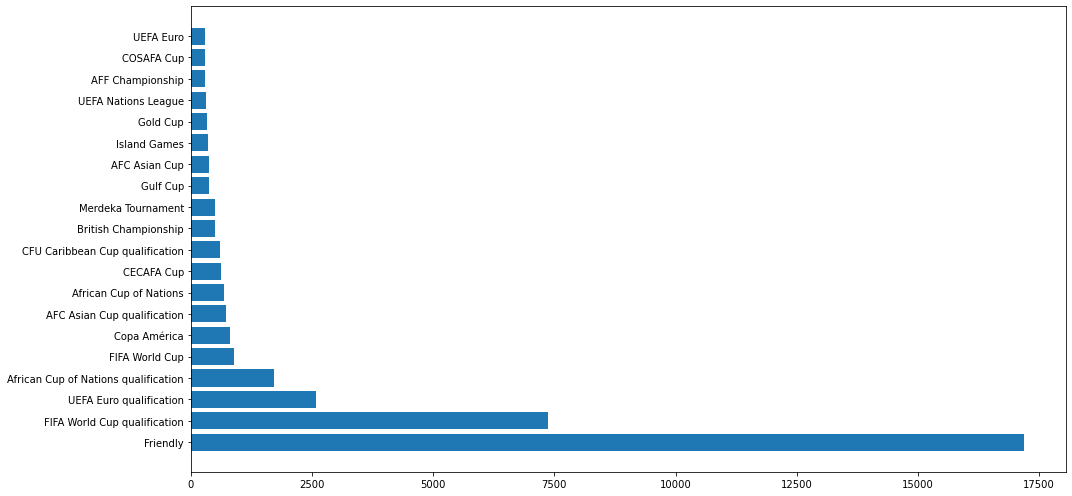

In [4]:
plt.figure(figsize=(15, 7))
x = res['tournament'].value_counts().index[:20]
y = res['tournament'].value_counts().values[:20]
plt.barh(x, y)
plt.tight_layout()
plt.show()

Fifa tournament away and home goals

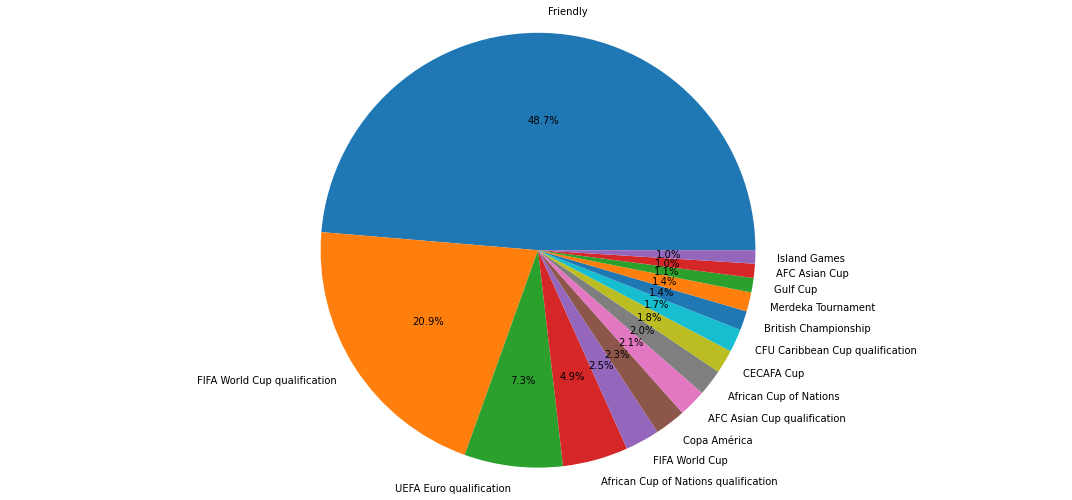

In [5]:
# Graph4
tournaments=res.tournament.value_counts()
alltournaments=tournaments[:15]

plt.figure(figsize=(15,7))
plt.pie(alltournaments.values,labels=alltournaments.index,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

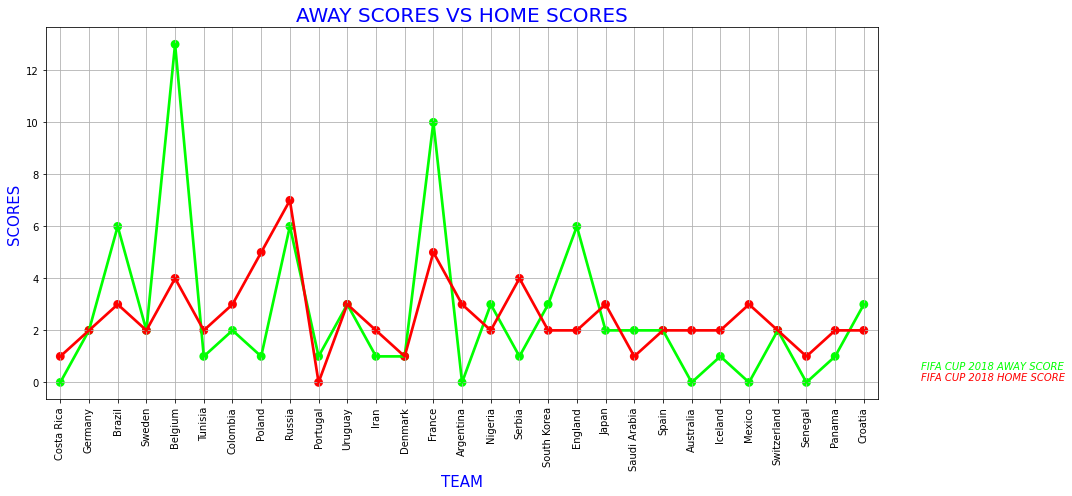

In [6]:
fifagoals=res[res['tournament']=='FIFA World Cup'].tail(56)

len(fifagoals['home_team'].unique())
allteam=fifagoals['home_team'].unique()

len(fifagoals['home_team'].unique())
allteam=fifagoals['home_team'].unique()

away_scores_allteam=[]
home_scores_allteam=[]
for team in allteam:
    toplam=sum(fifagoals[fifagoals['home_team']==team].away_score)
    away_scores_allteam.append(toplam)
    home_scores_allteam.append(sum(fifagoals[fifagoals['home_team']==team].home_score))
    toplam=0

all_team=pd.DataFrame([allteam,home_scores_allteam,away_scores_allteam])

f,ax1=plt.subplots(figsize=(15,7))
sns.pointplot(x=allteam,y=home_scores_allteam,data=fifagoals,color='lime',alpha=0.8)
sns.pointplot(x=allteam,y=away_scores_allteam,data=fifagoals,color='red',alpha=0.8)
plt.text(30,0.1,'FIFA CUP 2018 HOME SCORE',color='red',fontsize = 10,style = 'italic')
plt.text(30,0.5,'FIFA CUP 2018 AWAY SCORE',color='lime',fontsize = 10,style = 'italic')
plt.xlabel('TEAM',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('SCORES',fontsize = 15,color='blue')
plt.title('AWAY SCORES VS HOME SCORES',fontsize = 20,color='blue')
plt.grid()
plt.tight_layout()
plt.show()

Ne bllokun e meposhtem kemi indeksuar te gjitha ekipet qe kane marre pjese ne kampionat boteror

In [7]:
res_filter = res[res.tournament == 'FIFA World Cup']
res_filter = res_filter.reset_index(drop=True)

# Listo te gjitha shtetet (ekipet) qe ndonjehere kan marre pjese ne FWC
# dhe bashkangjitja nga nje index
kombetaret = {}
index = 0
for idx, row in res_filter.iterrows():
    kombetarja = row['home_team']
    if (kombetarja not in kombetaret.keys()):
        kombetaret[kombetarja] = index
        index += 1
    kombetarja = row['away_team']
    if (kombetarja not in kombetaret.keys()):
        kombetaret[kombetarja] = index
        index += 1

# Listo fituesit e FWC me numrin perkates te trofeut te fituar
trofe_te_fituar = cup['Winner'].value_counts()

# Zgjeroje datasetin me 2 kolona, te cilat permbajne numrin FWC te fituar nga ekipi vendes konkretisht ekipi musafir
res_filter['home_goals'] = 0
res_filter['away_goals'] = 0
res_filter['home_team_cup'] = 0
res_filter['away_team_cup'] = 0

In [8]:
# Numero golat
from IPython.core.display import HTML
home_goals = res[res['tournament']=='FIFA World Cup'].drop(['date', 'away_team', 'away_score', 'tournament', 'city', 'country','neutral'], 1)
home_goals = pd.DataFrame(home_goals.groupby(['home_team'], as_index=False).sum())
home_goals = home_goals.rename(columns={'home_team': 'team', 'home_score': 'score'})

away_goals = res[res['tournament']=='FIFA World Cup'].drop(['date', 'home_team', 'home_score', 'tournament', 'city', 'country','neutral'], 1)
away_goals = pd.DataFrame(away_goals.groupby(['away_team'], as_index=False).sum())
away_goals = away_goals.rename(columns={'away_team': 'team', 'away_score': 'score'})

goals = pd.concat([home_goals, away_goals], ignore_index=True)
goals = pd.DataFrame(goals.groupby(['team'], as_index=False).sum())
goals_dict = goals.set_index('team').T.to_dict()


def numero_trofete(df):
  if(trofe_te_fituar.get(df['home_team']) != None):
    df['home_team_cup'] = trofe_te_fituar.get(df['home_team'])
  if(trofe_te_fituar.get(df['away_team']) != None):
    df['away_team_cup'] = trofe_te_fituar.get(df['away_team'])
  return df


res_filter = res_filter.apply(numero_trofete, axis='columns')


def numero_golat(df):
    df['home_goals'] = goals_dict.get(df['home_team'])['score']
    df['away_goals'] = goals_dict.get(df['away_team'])['score']
    return df


res_filter = res_filter.apply(numero_golat, axis='columns')

print("DataFrame2")
display(HTML(res_filter.to_html()))


# Shto nje kolone te re e cila permbane fituesin e ndeshjes
res_filter['Winner'] = '-'


def indekso_fituesin(df):
    if(int(df['home_score']) == int(df['away_score'])):
        df['Winner'] = 0
    elif(int(df['home_score']) > int(df['away_score'])):
        df['Winner'] = 1
    else:
        df['Winner'] = 2
    return df


res_filter = res_filter.apply(indekso_fituesin, axis='columns')

DataFrame2


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_goals,away_goals,home_team_cup,away_team_cup
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,68,37,0,0
1,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,120,60,1,0
2,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,229,55,5,0
3,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,21,30,0,0
4,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,137,120,2,1
5,1930-07-16,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True,40,60,0,0
6,1930-07-17,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,1,55,0,0
7,1930-07-17,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,30,37,0,0
8,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,87,21,2,0
9,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,137,60,2,0


Model training begins here

In [9]:
# Largo kolonat e panevojshme
res_filter_drop = res_filter.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country','neutral'], 1)


# Zevendesoje emrin e kombetares me nje numer (index)
def indekso_kombetaret(df):
    df['home_team'] = kombetaret[df['home_team']]
    df['away_team'] = kombetaret[df['away_team']]
    return df


teamid_matches = res_filter_drop.apply(indekso_kombetaret, axis='columns')

# TRAINING STEPS
# Krijimi i numpy array
X = teamid_matches.loc[:, ['home_team', 'away_team', 'home_goals', 'away_goals', 'home_team_cup', 'away_team_cup']]
X = np.array(X).astype('float64')

# Shtimi i te dhenave te reja, ashtu qe zevendesohen kolonat: 
# home_team me away_team, home_team_cup me away_team_cup dhe zevendesohet rezultati (winner)
_X = X.copy()

_X[:, 0] = X[:, 1]
_X[:, 1] = X[:, 0]
_X[:, 2] = X[:, 3]
_X[:, 3] = X[:, 2]

y = res_filter_drop.loc[:, ['Winner']]
y = np.array(y).astype('int')
y = np.reshape(y, (1, 900))
y = y[0]

_y = y.copy()

for i in range(len(_y)):
    if (_y[i] == 1):
        _y[i] = 2
    elif (_y[i] == 2):
        _y[i] = 1

# Duhet bere ne menyre qe parashikimi te funksionoje njejte si per ekipin vendas ashtu edhe ate musafir
X = np.concatenate((X, _X), axis=0)
y = np.concatenate((y, _y))

X,y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Ndertimi i modelit
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [10]:
def parashikimi(team1, team2):
  id1 = kombetaret[team1]
  id2 = kombetaret[team2]
  gola_te_shenuar1 = goals_dict.get(team1)['score']
  gola_te_shenuar2 = goals_dict.get(team2)['score']
  trofe_te_fituar1 = trofe_te_fituar.get(team1) if trofe_te_fituar.get(team1) != None else 0
  trofe_te_fituar2 = trofe_te_fituar.get(team2) if trofe_te_fituar.get(team2) != None else 0

  x = np.array([id1, id2, gola_te_shenuar1, gola_te_shenuar2, trofe_te_fituar1, trofe_te_fituar2]).astype('float64')
  x = np.reshape(x, (1,-1))     # 1D row array
  _y = svm_model.predict_proba(x)[0]

  text = ('Chance for '+team1+' to win against '+team2+' is {}\nChance for '+team2+' to win against '+team1+' is {}\nChance for '+team1+' and '+team2+' to draw is {}').format(_y[1]*100,_y[2]*100,_y[0]*100)
  return text


# Predict match between France and Uruguay
text1 = parashikimi('Belgium', 'Brazil')
print(text1)


Chance for Belgium to win against Brazil is 19.250171393544658
Chance for Brazil to win against Belgium is 59.32547276499094
Chance for Belgium and Brazil to draw is 21.424355841464436
